In [1]:
import os

In [2]:
import cv2 as cv
import pandas as pd
import pydicom as dicom
import matplotlib.pyplot as plt
import xmltodict
import cv2 as cv
import re

In [3]:
import shutil

In [4]:
from skimage import morphology
from skimage import measure
from skimage.filters import threshold_otsu, median
from scipy.ndimage import binary_fill_holes
from skimage.segmentation import clear_border
from scipy.stats import describe

In [5]:
import numpy as np

In [6]:
import xml.etree.ElementTree as et 

isim Değiştirme


In [7]:
xml_files_path="dataSon/xml"
xml_files=os.listdir(xml_files_path)
for file_name in xml_files:
    name = file_name.split("-")[0]
    name = name.replace(" ","_")
    src_file_path = os.path.join(xml_files_path,file_name)
    dis_file_path = os.path.join(xml_files_path, name)
    os.rename(src_file_path, dis_file_path)   

In [6]:
dicom_files_path="dataSon/dicom"
dicom_files=os.listdir(dicom_files_path)
for patient in dicom_files:
    dcm_folder = os.listdir(os.path.join(dicom_files_path,patient))[0]
    dcm_files = os.listdir(os.path.join(dicom_files_path,patient, dcm_folder))
    for dcm in dcm_files: 
        try:
            srcpath = os.path.join(dicom_files_path,patient, dcm_folder,dcm)
            new_name = dcm.split(".")[-2]+".dcm"
            dstpath = os.path.join(dicom_files_path,patient, new_name)                    
            if not os.path.exists(dstpath):
                print(srcpath,dstpath)
                shutil.copy(srcpath,dstpath)   
        except:
            print(srcpath,dstpath)

dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.123.dcm dataSon/dicom\Hanife Savas\123.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.124.dcm dataSon/dicom\Hanife Savas\124.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.13.dcm dataSon/dicom\Hanife Savas\13.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.14.dcm dataSon/dicom\Hanife Savas\14.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.15.dcm dataSon/dicom\Hanife Savas\15.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.15490006

dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.54.dcm dataSon/dicom\Hanife Savas\54.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.55.dcm dataSon/dicom\Hanife Savas\55.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.56.dcm dataSon/dicom\Hanife Savas\56.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.57.dcm dataSon/dicom\Hanife Savas\57.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.58.dcm dataSon/dicom\Hanife Savas\58.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.8

dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.98.dcm dataSon/dicom\Hanife Savas\98.dcm
dataSon/dicom\Hanife Savas\1.2.840.113619.2.428.3.688540491.598.1549000672.319.3\1.2.840.113619.2.428.3.688540491.598.1549000672.863.99.dcm dataSon/dicom\Hanife Savas\99.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.1.dcm dataSon/dicom\Hasan Acikgoz\1.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.10.dcm dataSon/dicom\Hasan Acikgoz\10.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.11.dcm dataSon/dicom\Hasan Acikgoz\11.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640

dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.5.dcm dataSon/dicom\Hasan Acikgoz\5.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.50.dcm dataSon/dicom\Hasan Acikgoz\50.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.51.dcm dataSon/dicom\Hasan Acikgoz\51.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.52.dcm dataSon/dicom\Hasan Acikgoz\52.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.53.dcm dataSon/dicom\Hasan Acikgoz\53.dcm
dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.155

dataSon/dicom\Hasan Acikgoz\1.2.840.113619.2.428.3.688540491.609.1550640275.683.3\1.2.840.113619.2.428.3.688540491.609.1550640275.965.92.dcm dataSon/dicom\Hasan Acikgoz\92.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.1.dcm dataSon/dicom\Hasan Altinbas\1.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.10.dcm dataSon/dicom\Hasan Altinbas\10.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.11.dcm dataSon/dicom\Hasan Altinbas\11.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.12.dcm dataSon/dicom\Hasan Altinbas\12.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.68854049

dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.50.dcm dataSon/dicom\Hasan Altinbas\50.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.51.dcm dataSon/dicom\Hasan Altinbas\51.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.52.dcm dataSon/dicom\Hasan Altinbas\52.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.53.dcm dataSon/dicom\Hasan Altinbas\53.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.54.dcm dataSon/dicom\Hasan Altinbas\54.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.6885

dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.93.dcm dataSon/dicom\Hasan Altinbas\93.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.94.dcm dataSon/dicom\Hasan Altinbas\94.dcm
dataSon/dicom\Hasan Altinbas\1.2.840.113619.2.428.3.688540491.588.1552802100.992.3\1.2.840.113619.2.428.3.688540491.588.1552802101.283.95.dcm dataSon/dicom\Hasan Altinbas\95.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.1.dcm dataSon/dicom\Hasan Demir\1.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.10.dcm dataSon/dicom\Hasan Demir\10.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516

dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.41.dcm dataSon/dicom\Hasan Demir\41.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.42.dcm dataSon/dicom\Hasan Demir\42.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.43.dcm dataSon/dicom\Hasan Demir\43.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.44.dcm dataSon/dicom\Hasan Demir\44.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.45.dcm dataSon/dicom\Hasan Demir\45.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.46.dcm d

dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.85.dcm dataSon/dicom\Hasan Demir\85.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.86.dcm dataSon/dicom\Hasan Demir\86.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.87.dcm dataSon/dicom\Hasan Demir\87.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.88.dcm dataSon/dicom\Hasan Demir\88.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.89.dcm dataSon/dicom\Hasan Demir\89.dcm
dataSon/dicom\Hasan Demir\1.2.840.113619.2.428.3.688540491.590.1549516104.401.3\1.2.840.113619.2.428.3.688540491.590.1549516104.728.9.dcm da

dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.39.dcm dataSon/dicom\Hasan Tezcan\39.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.4.dcm dataSon/dicom\Hasan Tezcan\4.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.40.dcm dataSon/dicom\Hasan Tezcan\40.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.41.dcm dataSon/dicom\Hasan Tezcan\41.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.42.dcm dataSon/dicom\Hasan Tezcan\42.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682

dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.82.dcm dataSon/dicom\Hasan Tezcan\82.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.83.dcm dataSon/dicom\Hasan Tezcan\83.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.84.dcm dataSon/dicom\Hasan Tezcan\84.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.85.dcm dataSon/dicom\Hasan Tezcan\85.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.682.86.dcm dataSon/dicom\Hasan Tezcan\86.dcm
dataSon/dicom\Hasan Tezcan\1.2.840.113619.2.428.3.688540491.834.1573102335.379.3\1.2.840.113619.2.428.3.688540491.834.1573102335.6

dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.35.dcm dataSon/dicom\Hatice Atar\35.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.36.dcm dataSon/dicom\Hatice Atar\36.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.37.dcm dataSon/dicom\Hatice Atar\37.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.38.dcm dataSon/dicom\Hatice Atar\38.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.39.dcm dataSon/dicom\Hatice Atar\39.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.4.dcm da

dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.79.dcm dataSon/dicom\Hatice Atar\79.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.8.dcm dataSon/dicom\Hatice Atar\8.dcm
dataSon/dicom\Hatice Atar\1.2.840.113619.2.428.3.688540491.701.1550036843.391.3\1.2.840.113619.2.428.3.688540491.701.1550036843.634.9.dcm dataSon/dicom\Hatice Atar\9.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.1.dcm dataSon/dicom\Hikmet Unlu\1.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.10.dcm dataSon/dicom\Hikmet Unlu\10.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.11.dcm dataSon

dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.50.dcm dataSon/dicom\Hikmet Unlu\50.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.51.dcm dataSon/dicom\Hikmet Unlu\51.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.52.dcm dataSon/dicom\Hikmet Unlu\52.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.53.dcm dataSon/dicom\Hikmet Unlu\53.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.54.dcm dataSon/dicom\Hikmet Unlu\54.dcm
dataSon/dicom\Hikmet Unlu\1.2.840.113619.2.428.3.688540491.606.1550971530.238.3\1.2.840.113619.2.428.3.688540491.606.1550971530.525.55.dcm d

dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.1.dcm dataSon/dicom\Hilmi Ozturk\1.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.10.dcm dataSon/dicom\Hilmi Ozturk\10.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.11.dcm dataSon/dicom\Hilmi Ozturk\11.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.12.dcm dataSon/dicom\Hilmi Ozturk\12.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.13.dcm dataSon/dicom\Hilmi Ozturk\13.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189

dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.52.dcm dataSon/dicom\Hilmi Ozturk\52.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.53.dcm dataSon/dicom\Hilmi Ozturk\53.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.54.dcm dataSon/dicom\Hilmi Ozturk\54.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.55.dcm dataSon/dicom\Hilmi Ozturk\55.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.56.dcm dataSon/dicom\Hilmi Ozturk\56.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.1

dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.92.dcm dataSon/dicom\Hilmi Ozturk\92.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.93.dcm dataSon/dicom\Hilmi Ozturk\93.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.94.dcm dataSon/dicom\Hilmi Ozturk\94.dcm
dataSon/dicom\Hilmi Ozturk\1.2.840.113619.2.428.3.688540491.780.1551332509.899.3\1.2.840.113619.2.428.3.688540491.780.1551332510.189.95.dcm dataSon/dicom\Hilmi Ozturk\95.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.945.1.dcm dataSon/dicom\Hulya Erdogan\1.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.

dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.945.48.dcm dataSon/dicom\Hulya Erdogan\48.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.945.49.dcm dataSon/dicom\Hulya Erdogan\49.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.945.5.dcm dataSon/dicom\Hulya Erdogan\5.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.945.50.dcm dataSon/dicom\Hulya Erdogan\50.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.1551332520.945.51.dcm dataSon/dicom\Hulya Erdogan\51.dcm
dataSon/dicom\Hulya Erdogan\1.2.840.113619.2.428.3.688540491.780.1551332520.694.3\1.2.840.113619.2.428.3.688540491.780.155

dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.13.dcm dataSon/dicom\Imdat Cilekci\13.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.14.dcm dataSon/dicom\Imdat Cilekci\14.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.15.dcm dataSon/dicom\Imdat Cilekci\15.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.16.dcm dataSon/dicom\Imdat Cilekci\16.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.17.dcm dataSon/dicom\Imdat Cilekci\17.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1

dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.56.dcm dataSon/dicom\Imdat Cilekci\56.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.57.dcm dataSon/dicom\Imdat Cilekci\57.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.58.dcm dataSon/dicom\Imdat Cilekci\58.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.59.dcm dataSon/dicom\Imdat Cilekci\59.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.6.dcm dataSon/dicom\Imdat Cilekci\6.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.155

dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.98.dcm dataSon/dicom\Imdat Cilekci\98.dcm
dataSon/dicom\Imdat Cilekci\1.2.840.113619.2.428.3.688540491.620.1552368939.522.3\1.2.840.113619.2.428.3.688540491.620.1552368939.828.99.dcm dataSon/dicom\Imdat Cilekci\99.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.1.dcm dataSon/dicom\Ipek Ozkurt\1.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.10.dcm dataSon/dicom\Ipek Ozkurt\10.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.11.dcm dataSon/dicom\Ipek Ozkurt\11.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.12

dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.5.dcm dataSon/dicom\Ipek Ozkurt\5.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.50.dcm dataSon/dicom\Ipek Ozkurt\50.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.51.dcm dataSon/dicom\Ipek Ozkurt\51.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.52.dcm dataSon/dicom\Ipek Ozkurt\52.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.53.dcm dataSon/dicom\Ipek Ozkurt\53.dcm
dataSon/dicom\Ipek Ozkurt\1.2.840.113619.2.428.3.688540491.634.1549431972.997.3\1.2.840.113619.2.428.3.688540491.634.1549431973.248.54.dcm dat

dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.19.dcm dataSon/dicom\Ishak Celik\19.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.2.dcm dataSon/dicom\Ishak Celik\2.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.20.dcm dataSon/dicom\Ishak Celik\20.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.21.dcm dataSon/dicom\Ishak Celik\21.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.22.dcm dataSon/dicom\Ishak Celik\22.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.23.dcm dat

dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.60.dcm dataSon/dicom\Ishak Celik\60.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.61.dcm dataSon/dicom\Ishak Celik\61.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.62.dcm dataSon/dicom\Ishak Celik\62.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.63.dcm dataSon/dicom\Ishak Celik\63.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.64.dcm dataSon/dicom\Ishak Celik\64.dcm
dataSon/dicom\Ishak Celik\1.2.840.113619.2.428.3.688540491.585.1551158700.298.3\1.2.840.113619.2.428.3.688540491.585.1551158700.600.65.dcm d

dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.10.dcm dataSon/dicom\Kemal Akgumus\10.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.100.dcm dataSon/dicom\Kemal Akgumus\100.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.11.dcm dataSon/dicom\Kemal Akgumus\11.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.12.dcm dataSon/dicom\Kemal Akgumus\12.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.13.dcm dataSon/dicom\Kemal Akgumus\13.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596

dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.51.dcm dataSon/dicom\Kemal Akgumus\51.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.52.dcm dataSon/dicom\Kemal Akgumus\52.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.53.dcm dataSon/dicom\Kemal Akgumus\53.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.54.dcm dataSon/dicom\Kemal Akgumus\54.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.55.dcm dataSon/dicom\Kemal Akgumus\55.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1

dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.9.dcm dataSon/dicom\Kemal Akgumus\9.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.90.dcm dataSon/dicom\Kemal Akgumus\90.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.91.dcm dataSon/dicom\Kemal Akgumus\91.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.92.dcm dataSon/dicom\Kemal Akgumus\92.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.1549173642.842.93.dcm dataSon/dicom\Kemal Akgumus\93.dcm
dataSon/dicom\Kemal Akgumus\1.2.840.113619.2.428.3.688540491.596.1549173642.536.3\1.2.840.113619.2.428.3.688540491.596.154

dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.43.dcm dataSon/dicom\Mehmet Cun\43.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.44.dcm dataSon/dicom\Mehmet Cun\44.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.45.dcm dataSon/dicom\Mehmet Cun\45.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.46.dcm dataSon/dicom\Mehmet Cun\46.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.47.dcm dataSon/dicom\Mehmet Cun\47.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.48.dcm dataSon/dico

dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.89.dcm dataSon/dicom\Mehmet Cun\89.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.9.dcm dataSon/dicom\Mehmet Cun\9.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.90.dcm dataSon/dicom\Mehmet Cun\90.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.91.dcm dataSon/dicom\Mehmet Cun\91.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.92.dcm dataSon/dicom\Mehmet Cun\92.dcm
dataSon/dicom\Mehmet Cun\1.2.840.113619.2.428.3.688540491.596.1549173635.984.3\1.2.840.113619.2.428.3.688540491.596.1549173636.288.93.dcm dataSon/dicom\

dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.39.dcm dataSon/dicom\Mehmet Nuri Ciloglu\39.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.4.dcm dataSon/dicom\Mehmet Nuri Ciloglu\4.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.40.dcm dataSon/dicom\Mehmet Nuri Ciloglu\40.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.41.dcm dataSon/dicom\Mehmet Nuri Ciloglu\41.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.42.dcm dataSon/dicom\Mehmet Nuri Ciloglu\42.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.

dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.78.dcm dataSon/dicom\Mehmet Nuri Ciloglu\78.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.79.dcm dataSon/dicom\Mehmet Nuri Ciloglu\79.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.8.dcm dataSon/dicom\Mehmet Nuri Ciloglu\8.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.80.dcm dataSon/dicom\Mehmet Nuri Ciloglu\80.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.771.1554183805.14.3\1.2.840.113619.2.428.3.688540491.771.1554183805.312.81.dcm dataSon/dicom\Mehmet Nuri Ciloglu\81.dcm
dataSon/dicom\Mehmet Nuri Ciloglu\1.2.840.113619.2.428.3.688540491.

dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.23.dcm dataSon/dicom\Mehmet Topcu\23.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.24.dcm dataSon/dicom\Mehmet Topcu\24.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.25.dcm dataSon/dicom\Mehmet Topcu\25.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.26.dcm dataSon/dicom\Mehmet Topcu\26.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.27.dcm dataSon/dicom\Mehmet Topcu\27.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.9

dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.66.dcm dataSon/dicom\Mehmet Topcu\66.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.67.dcm dataSon/dicom\Mehmet Topcu\67.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.68.dcm dataSon/dicom\Mehmet Topcu\68.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.69.dcm dataSon/dicom\Mehmet Topcu\69.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936.7.dcm dataSon/dicom\Mehmet Topcu\7.dcm
dataSon/dicom\Mehmet Topcu\1.2.840.113619.2.428.3.688540491.824.1601787143.609.3\1.2.840.113619.2.428.3.688540491.824.1601787143.936

dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.18.dcm dataSon/dicom\Mehmet Yıldırım\18.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.19.dcm dataSon/dicom\Mehmet Yıldırım\19.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.2.dcm dataSon/dicom\Mehmet Yıldırım\2.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.20.dcm dataSon/dicom\Mehmet Yıldırım\20.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.21.dcm dataSon/dicom\Mehmet Yıldırım\21.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.4

dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.59.dcm dataSon/dicom\Mehmet Yıldırım\59.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.6.dcm dataSon/dicom\Mehmet Yıldırım\6.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.60.dcm dataSon/dicom\Mehmet Yıldırım\60.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.61.dcm dataSon/dicom\Mehmet Yıldırım\61.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.428.3.688540491.780.1551332491.771.62.dcm dataSon/dicom\Mehmet Yıldırım\62.dcm
dataSon/dicom\Mehmet Yıldırım\1.2.840.113619.2.428.3.688540491.780.1551332491.497.3\1.2.840.113619.2.4

dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.19.dcm dataSon/dicom\Menzer Ağüzüm\19.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.2.dcm dataSon/dicom\Menzer Ağüzüm\2.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.20.dcm dataSon/dicom\Menzer Ağüzüm\20.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.21.dcm dataSon/dicom\Menzer Ağüzüm\21.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.22.dcm dataSon/dicom\Menzer Ağüzüm\22.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.15511586

dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.60.dcm dataSon/dicom\Menzer Ağüzüm\60.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.61.dcm dataSon/dicom\Menzer Ağüzüm\61.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.62.dcm dataSon/dicom\Menzer Ağüzüm\62.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.63.dcm dataSon/dicom\Menzer Ağüzüm\63.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.1551158667.17.64.dcm dataSon/dicom\Menzer Ağüzüm\64.dcm
dataSon/dicom\Menzer Ağüzüm\1.2.840.113619.2.428.3.688540491.585.1551158666.769.3\1.2.840.113619.2.428.3.688540491.585.155115

dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.27.dcm dataSon/dicom\Muhammet Emin Can\27.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.28.dcm dataSon/dicom\Muhammet Emin Can\28.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.29.dcm dataSon/dicom\Muhammet Emin Can\29.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.3.dcm dataSon/dicom\Muhammet Emin Can\3.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.30.dcm dataSon/dicom\Muhammet Emin Can\30.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.31

dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.68.dcm dataSon/dicom\Muhammet Emin Can\68.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.69.dcm dataSon/dicom\Muhammet Emin Can\69.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.7.dcm dataSon/dicom\Muhammet Emin Can\7.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.70.dcm dataSon/dicom\Muhammet Emin Can\70.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.319.3\1.2.840.113619.2.428.3.688540491.589.1553143131.609.71.dcm dataSon/dicom\Muhammet Emin Can\71.dcm
dataSon/dicom\Muhammet Emin Can\1.2.840.113619.2.428.3.688540491.589.1553143131.31

dataSon/dicom\Mustafa Durgut\1.2.840.113619.2.428.3.688540491.765.1548826324.724.3\1.2.840.113619.2.428.3.688540491.765.1548826325.27.22.dcm dataSon/dicom\Mustafa Durgut\22.dcm
dataSon/dicom\Mustafa Durgut\1.2.840.113619.2.428.3.688540491.765.1548826324.724.3\1.2.840.113619.2.428.3.688540491.765.1548826325.27.23.dcm dataSon/dicom\Mustafa Durgut\23.dcm
dataSon/dicom\Mustafa Durgut\1.2.840.113619.2.428.3.688540491.765.1548826324.724.3\1.2.840.113619.2.428.3.688540491.765.1548826325.27.24.dcm dataSon/dicom\Mustafa Durgut\24.dcm
dataSon/dicom\Mustafa Durgut\1.2.840.113619.2.428.3.688540491.765.1548826324.724.3\1.2.840.113619.2.428.3.688540491.765.1548826325.27.25.dcm dataSon/dicom\Mustafa Durgut\25.dcm
dataSon/dicom\Mustafa Durgut\1.2.840.113619.2.428.3.688540491.765.1548826324.724.3\1.2.840.113619.2.428.3.688540491.765.1548826325.27.26.dcm dataSon/dicom\Mustafa Durgut\26.dcm
dataSon/dicom\Mustafa Durgut\1.2.840.113619.2.428.3.688540491.765.1548826324.724.3\1.2.840.113619.2.428.3.688540491

dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.102.dcm dataSon/dicom\Mustafa Eyi\102.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.103.dcm dataSon/dicom\Mustafa Eyi\103.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.104.dcm dataSon/dicom\Mustafa Eyi\104.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.104.dcm dataSon/dicom\Mustafa Eyi\104.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.105.dcm dataSon/dicom\Mustafa Eyi\105.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.65

dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.141.dcm dataSon/dicom\Mustafa Eyi\141.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.142.dcm dataSon/dicom\Mustafa Eyi\142.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.143.dcm dataSon/dicom\Mustafa Eyi\143.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.144.dcm dataSon/dicom\Mustafa Eyi\144.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.145.dcm dataSon/dicom\Mustafa Eyi\145.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.65

dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.29.dcm dataSon/dicom\Mustafa Eyi\29.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.3.dcm dataSon/dicom\Mustafa Eyi\3.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.30.dcm dataSon/dicom\Mustafa Eyi\30.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.31.dcm dataSon/dicom\Mustafa Eyi\31.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.32.dcm dataSon/dicom\Mustafa Eyi\32.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.33.dcm dat

dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.68.dcm dataSon/dicom\Mustafa Eyi\68.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.69.dcm dataSon/dicom\Mustafa Eyi\69.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.7.dcm dataSon/dicom\Mustafa Eyi\7.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.70.dcm dataSon/dicom\Mustafa Eyi\70.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.71.dcm dataSon/dicom\Mustafa Eyi\71.dcm
dataSon/dicom\Mustafa Eyi\1.2.840.113619.2.428.3.688540491.609.1550640258.934.3\1.2.840.113619.2.428.3.688540491.609.1550640259.659.72.dcm dat

dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.13.dcm dataSon/dicom\Mustafa Karatas\13.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.14.dcm dataSon/dicom\Mustafa Karatas\14.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.15.dcm dataSon/dicom\Mustafa Karatas\15.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.16.dcm dataSon/dicom\Mustafa Karatas\16.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.17.dcm dataSon/dicom\Mustafa Karatas\17.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.

dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.51.dcm dataSon/dicom\Mustafa Karatas\51.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.51.dcm dataSon/dicom\Mustafa Karatas\51.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.52.dcm dataSon/dicom\Mustafa Karatas\52.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.53.dcm dataSon/dicom\Mustafa Karatas\53.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.54.dcm dataSon/dicom\Mustafa Karatas\54.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.

dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.91.dcm dataSon/dicom\Mustafa Karatas\91.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.91.dcm dataSon/dicom\Mustafa Karatas\91.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.92.dcm dataSon/dicom\Mustafa Karatas\92.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.93.dcm dataSon/dicom\Mustafa Karatas\93.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.3.688540491.742.1551853322.56.93.dcm dataSon/dicom\Mustafa Karatas\93.dcm
dataSon/dicom\Mustafa Karatas\1.2.840.113619.2.428.3.688540491.742.1551853321.760.3\1.2.840.113619.2.428.

dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.4.dcm dataSon/dicom\Mustafa Mucahid Konak\4.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.40.dcm dataSon/dicom\Mustafa Mucahid Konak\40.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.41.dcm dataSon/dicom\Mustafa Mucahid Konak\41.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.42.dcm dataSon/dicom\Mustafa Mucahid Konak\42.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.43.dcm dataSon/dicom\Mustafa Mucahid Konak\43.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.84

dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.76.dcm dataSon/dicom\Mustafa Mucahid Konak\76.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.77.dcm dataSon/dicom\Mustafa Mucahid Konak\77.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.78.dcm dataSon/dicom\Mustafa Mucahid Konak\78.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.79.dcm dataSon/dicom\Mustafa Mucahid Konak\79.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.840.113619.2.428.3.688540491.377.1532666059.245.3\1.2.840.113619.2.428.3.688540491.377.1532666059.546.8.dcm dataSon/dicom\Mustafa Mucahid Konak\8.dcm
dataSon/dicom\Mustafa Mucahid Konak\1.2.84

dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.25.dcm dataSon/dicom\Muzaffer Yalcin\25.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.26.dcm dataSon/dicom\Muzaffer Yalcin\26.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.27.dcm dataSon/dicom\Muzaffer Yalcin\27.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.28.dcm dataSon/dicom\Muzaffer Yalcin\28.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.29.dcm dataSon/dicom\Muzaffer Yalcin\29.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2

dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.65.dcm dataSon/dicom\Muzaffer Yalcin\65.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.66.dcm dataSon/dicom\Muzaffer Yalcin\66.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.67.dcm dataSon/dicom\Muzaffer Yalcin\67.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.68.dcm dataSon/dicom\Muzaffer Yalcin\68.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2.428.3.688540491.602.1549864176.135.69.dcm dataSon/dicom\Muzaffer Yalcin\69.dcm
dataSon/dicom\Muzaffer Yalcin\1.2.840.113619.2.428.3.688540491.602.1549864175.831.3\1.2.840.113619.2

dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.15.dcm dataSon/dicom\Necla Kor\15.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.15.dcm dataSon/dicom\Necla Kor\15.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.16.dcm dataSon/dicom\Necla Kor\16.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.17.dcm dataSon/dicom\Necla Kor\17.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.17.dcm dataSon/dicom\Necla Kor\17.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.18.dcm dataSon/dicom\Necla Kor\18.dc

dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.6.dcm dataSon/dicom\Necla Kor\6.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.60.dcm dataSon/dicom\Necla Kor\60.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.61.dcm dataSon/dicom\Necla Kor\61.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.62.dcm dataSon/dicom\Necla Kor\62.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.63.dcm dataSon/dicom\Necla Kor\63.dcm
dataSon/dicom\Necla Kor\1.2.840.113619.2.428.3.688540491.576.1550122546.99.3\1.2.840.113619.2.428.3.688540491.576.1550122546.592.64.dcm dataSon/dicom\Necla Kor\64.dcm


dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.29.dcm dataSon/dicom\Nermin Saglam\29.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.3.dcm dataSon/dicom\Nermin Saglam\3.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.30.dcm dataSon/dicom\Nermin Saglam\30.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.31.dcm dataSon/dicom\Nermin Saglam\31.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.32.dcm dataSon/dicom\Nermin Saglam\32.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.154

dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.71.dcm dataSon/dicom\Nermin Saglam\71.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.72.dcm dataSon/dicom\Nermin Saglam\72.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.73.dcm dataSon/dicom\Nermin Saglam\73.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.74.dcm dataSon/dicom\Nermin Saglam\74.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1549173620.149.75.dcm dataSon/dicom\Nermin Saglam\75.dcm
dataSon/dicom\Nermin Saglam\1.2.840.113619.2.428.3.688540491.596.1549173619.864.3\1.2.840.113619.2.428.3.688540491.596.1

dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.29.dcm dataSon/dicom\Nevzat Bavul\29.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.3.dcm dataSon/dicom\Nevzat Bavul\3.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.30.dcm dataSon/dicom\Nevzat Bavul\30.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.31.dcm dataSon/dicom\Nevzat Bavul\31.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.32.dcm dataSon/dicom\Nevzat Bavul\32.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239

dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.71.dcm dataSon/dicom\Nevzat Bavul\71.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.72.dcm dataSon/dicom\Nevzat Bavul\72.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.73.dcm dataSon/dicom\Nevzat Bavul\73.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.74.dcm dataSon/dicom\Nevzat Bavul\74.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.239.75.dcm dataSon/dicom\Nevzat Bavul\75.dcm
dataSon/dicom\Nevzat Bavul\1.2.840.113619.2.428.3.688540491.598.1549000672.937.3\1.2.840.113619.2.428.3.688540491.598.1549000673.2

dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.18.dcm dataSon/dicom\Nihat Bakar\18.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.19.dcm dataSon/dicom\Nihat Bakar\19.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.2.dcm dataSon/dicom\Nihat Bakar\2.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.20.dcm dataSon/dicom\Nihat Bakar\20.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.21.dcm dataSon/dicom\Nihat Bakar\21.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.22.dcm dat

dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.53.dcm dataSon/dicom\Nihat Bakar\53.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.54.dcm dataSon/dicom\Nihat Bakar\54.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.54.dcm dataSon/dicom\Nihat Bakar\54.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.55.dcm dataSon/dicom\Nihat Bakar\55.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.56.dcm dataSon/dicom\Nihat Bakar\56.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.56.dcm d

dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.90.dcm dataSon/dicom\Nihat Bakar\90.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.91.dcm dataSon/dicom\Nihat Bakar\91.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.91.dcm dataSon/dicom\Nihat Bakar\91.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.92.dcm dataSon/dicom\Nihat Bakar\92.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.93.dcm dataSon/dicom\Nihat Bakar\93.dcm
dataSon/dicom\Nihat Bakar\1.2.840.113619.2.428.3.688540491.742.1551853306.839.3\1.2.840.113619.2.428.3.688540491.742.1551853307.153.94.dcm d

dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.41.dcm dataSon/dicom\Nilgun Akfiliz\41.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.42.dcm dataSon/dicom\Nilgun Akfiliz\42.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.43.dcm dataSon/dicom\Nilgun Akfiliz\43.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.44.dcm dataSon/dicom\Nilgun Akfiliz\44.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.45.dcm dataSon/dicom\Nilgun Akfiliz\45.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.6885

dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.84.dcm dataSon/dicom\Nilgun Akfiliz\84.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.85.dcm dataSon/dicom\Nilgun Akfiliz\85.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.86.dcm dataSon/dicom\Nilgun Akfiliz\86.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.86.dcm dataSon/dicom\Nilgun Akfiliz\86.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.688540491.602.1549864175.541.87.dcm dataSon/dicom\Nilgun Akfiliz\87.dcm
dataSon/dicom\Nilgun Akfiliz\1.2.840.113619.2.428.3.688540491.602.1549864175.244.3\1.2.840.113619.2.428.3.6885

dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.35.dcm dataSon/dicom\Nurcihan Saydan\35.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.36.dcm dataSon/dicom\Nurcihan Saydan\36.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.37.dcm dataSon/dicom\Nurcihan Saydan\37.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.38.dcm dataSon/dicom\Nurcihan Saydan\38.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.39.dcm dataSon/dicom\Nurcihan Saydan\39.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2

dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.72.dcm dataSon/dicom\Nurcihan Saydan\72.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.73.dcm dataSon/dicom\Nurcihan Saydan\73.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.74.dcm dataSon/dicom\Nurcihan Saydan\74.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.75.dcm dataSon/dicom\Nurcihan Saydan\75.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2.428.3.688540491.634.1549431970.943.75.dcm dataSon/dicom\Nurcihan Saydan\75.dcm
dataSon/dicom\Nurcihan Saydan\1.2.840.113619.2.428.3.688540491.634.1549431970.662.3\1.2.840.113619.2

dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.2.dcm dataSon/dicom\Nurettin Dag\2.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.20.dcm dataSon/dicom\Nurettin Dag\20.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.21.dcm dataSon/dicom\Nurettin Dag\21.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.22.dcm dataSon/dicom\Nurettin Dag\22.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.23.dcm dataSon/dicom\Nurettin Dag\23.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838

dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.62.dcm dataSon/dicom\Nurettin Dag\62.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.63.dcm dataSon/dicom\Nurettin Dag\63.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.64.dcm dataSon/dicom\Nurettin Dag\64.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.65.dcm dataSon/dicom\Nurettin Dag\65.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.838.66.dcm dataSon/dicom\Nurettin Dag\66.dcm
dataSon/dicom\Nurettin Dag\1.2.840.113619.2.428.3.688540491.590.1549516092.506.3\1.2.840.113619.2.428.3.688540491.590.1549516092.8

dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.12.dcm dataSon/dicom\Orhan Gultekin\12.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.13.dcm dataSon/dicom\Orhan Gultekin\13.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.14.dcm dataSon/dicom\Orhan Gultekin\14.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.15.dcm dataSon/dicom\Orhan Gultekin\15.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.16.dcm dataSon/dicom\Orhan Gultekin\16.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.6885

dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.54.dcm dataSon/dicom\Orhan Gultekin\54.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.55.dcm dataSon/dicom\Orhan Gultekin\55.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.56.dcm dataSon/dicom\Orhan Gultekin\56.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.57.dcm dataSon/dicom\Orhan Gultekin\57.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.58.dcm dataSon/dicom\Orhan Gultekin\58.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.6885

dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.94.dcm dataSon/dicom\Orhan Gultekin\94.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.95.dcm dataSon/dicom\Orhan Gultekin\95.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.96.dcm dataSon/dicom\Orhan Gultekin\96.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.97.dcm dataSon/dicom\Orhan Gultekin\97.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.688540491.577.1571632081.712.98.dcm dataSon/dicom\Orhan Gultekin\98.dcm
dataSon/dicom\Orhan Gultekin\1.2.840.113619.2.428.3.688540491.577.1571632081.401.3\1.2.840.113619.2.428.3.6885

dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.48.dcm dataSon/dicom\Osman Aktop\48.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.49.dcm dataSon/dicom\Osman Aktop\49.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.5.dcm dataSon/dicom\Osman Aktop\5.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.50.dcm dataSon/dicom\Osman Aktop\50.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.51.dcm dataSon/dicom\Osman Aktop\51.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.52.dcm dat

dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.90.dcm dataSon/dicom\Osman Aktop\90.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.91.dcm dataSon/dicom\Osman Aktop\91.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.92.dcm dataSon/dicom\Osman Aktop\92.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.93.dcm dataSon/dicom\Osman Aktop\93.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.94.dcm dataSon/dicom\Osman Aktop\94.dcm
dataSon/dicom\Osman Aktop\1.2.840.113619.2.428.3.688540491.581.1551937835.528.3\1.2.840.113619.2.428.3.688540491.581.1551937835.817.95.dcm d

dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.31.dcm dataSon/dicom\Ozgur Bayhan\31.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.32.dcm dataSon/dicom\Ozgur Bayhan\32.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.33.dcm dataSon/dicom\Ozgur Bayhan\33.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.34.dcm dataSon/dicom\Ozgur Bayhan\34.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.35.dcm dataSon/dicom\Ozgur Bayhan\35.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.36.

dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.74.dcm dataSon/dicom\Ozgur Bayhan\74.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.75.dcm dataSon/dicom\Ozgur Bayhan\75.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.76.dcm dataSon/dicom\Ozgur Bayhan\76.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.77.dcm dataSon/dicom\Ozgur Bayhan\77.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.78.dcm dataSon/dicom\Ozgur Bayhan\78.dcm
dataSon/dicom\Ozgur Bayhan\1.2.840.113619.2.428.3.688540491.609.1550640260.79.3\1.2.840.113619.2.428.3.688540491.609.1550640260.430.79.

dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.23.dcm dataSon/dicom\Ramazan Cufa\23.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.24.dcm dataSon/dicom\Ramazan Cufa\24.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.25.dcm dataSon/dicom\Ramazan Cufa\25.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.26.dcm dataSon/dicom\Ramazan Cufa\26.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.27.dcm dataSon/dicom\Ramazan Cufa\27.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.6

dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.63.dcm dataSon/dicom\Ramazan Cufa\63.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.64.dcm dataSon/dicom\Ramazan Cufa\64.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.65.dcm dataSon/dicom\Ramazan Cufa\65.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.66.dcm dataSon/dicom\Ramazan Cufa\66.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.628.67.dcm dataSon/dicom\Ramazan Cufa\67.dcm
dataSon/dicom\Ramazan Cufa\1.2.840.113619.2.428.3.688540491.672.1550553392.311.3\1.2.840.113619.2.428.3.688540491.672.1550553392.6

dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.14.dcm dataSon/dicom\Remzi Keskin\14.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.15.dcm dataSon/dicom\Remzi Keskin\15.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.16.dcm dataSon/dicom\Remzi Keskin\16.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.17.dcm dataSon/dicom\Remzi Keskin\17.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.18.dcm dataSon/dicom\Remzi Keskin\18.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.7

dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.50.dcm dataSon/dicom\Remzi Keskin\50.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.51.dcm dataSon/dicom\Remzi Keskin\51.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.52.dcm dataSon/dicom\Remzi Keskin\52.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.53.dcm dataSon/dicom\Remzi Keskin\53.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.53.dcm dataSon/dicom\Remzi Keskin\53.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.7

dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.90.dcm dataSon/dicom\Remzi Keskin\90.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.91.dcm dataSon/dicom\Remzi Keskin\91.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.92.dcm dataSon/dicom\Remzi Keskin\92.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.93.dcm dataSon/dicom\Remzi Keskin\93.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.754.94.dcm dataSon/dicom\Remzi Keskin\94.dcm
dataSon/dicom\Remzi Keskin\1.2.840.113619.2.428.3.688540491.780.1551332494.446.3\1.2.840.113619.2.428.3.688540491.780.1551332494.7

dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.35.dcm dataSon/dicom\Saim Alkan\35.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.36.dcm dataSon/dicom\Saim Alkan\36.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.37.dcm dataSon/dicom\Saim Alkan\37.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.38.dcm dataSon/dicom\Saim Alkan\38.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.39.dcm dataSon/dicom\Saim Alkan\39.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.39.dcm dataSon/dico

dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.78.dcm dataSon/dicom\Saim Alkan\78.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.79.dcm dataSon/dicom\Saim Alkan\79.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.8.dcm dataSon/dicom\Saim Alkan\8.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.80.dcm dataSon/dicom\Saim Alkan\80.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.81.dcm dataSon/dicom\Saim Alkan\81.dcm
dataSon/dicom\Saim Alkan\1.2.840.113619.2.428.3.688540491.590.1549516110.431.3\1.2.840.113619.2.428.3.688540491.590.1549516110.750.81.dcm dataSon/dicom\

dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.30.dcm dataSon/dicom\Selami Bulut\30.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.31.dcm dataSon/dicom\Selami Bulut\31.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.32.dcm dataSon/dicom\Selami Bulut\32.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.33.dcm dataSon/dicom\Selami Bulut\33.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.34.dcm dataSon/dicom\Selami Bulut\34.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.35.

dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.72.dcm dataSon/dicom\Selami Bulut\72.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.73.dcm dataSon/dicom\Selami Bulut\73.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.74.dcm dataSon/dicom\Selami Bulut\74.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.75.dcm dataSon/dicom\Selami Bulut\75.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.76.dcm dataSon/dicom\Selami Bulut\76.dcm
dataSon/dicom\Selami Bulut\1.2.840.113619.2.428.3.688540491.585.1551158665.52.3\1.2.840.113619.2.428.3.688540491.585.1551158665.350.77.

dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.19.dcm dataSon/dicom\Serhat Koc\19.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.2.dcm dataSon/dicom\Serhat Koc\2.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.20.dcm dataSon/dicom\Serhat Koc\20.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.21.dcm dataSon/dicom\Serhat Koc\21.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.22.dcm dataSon/dicom\Serhat Koc\22.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.23.dcm dataSon/dicom\

dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.62.dcm dataSon/dicom\Serhat Koc\62.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.63.dcm dataSon/dicom\Serhat Koc\63.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.64.dcm dataSon/dicom\Serhat Koc\64.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.65.dcm dataSon/dicom\Serhat Koc\65.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.66.dcm dataSon/dicom\Serhat Koc\66.dcm
dataSon/dicom\Serhat Koc\1.2.840.113619.2.428.3.688540491.650.1592116410.483.3\1.2.840.113619.2.428.3.688540491.650.1592116410.795.67.dcm dataSon/dico

dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.104.dcm dataSon/dicom\Suheyl Aylan\104.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.105.dcm dataSon/dicom\Suheyl Aylan\105.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.106.dcm dataSon/dicom\Suheyl Aylan\106.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.107.dcm dataSon/dicom\Suheyl Aylan\107.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.108.dcm dataSon/dicom\Suheyl Aylan\108.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.15

dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.45.dcm dataSon/dicom\Suheyl Aylan\45.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.46.dcm dataSon/dicom\Suheyl Aylan\46.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.47.dcm dataSon/dicom\Suheyl Aylan\47.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.48.dcm dataSon/dicom\Suheyl Aylan\48.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.49.dcm dataSon/dicom\Suheyl Aylan\49.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.5

dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.86.dcm dataSon/dicom\Suheyl Aylan\86.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.87.dcm dataSon/dicom\Suheyl Aylan\87.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.88.dcm dataSon/dicom\Suheyl Aylan\88.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.89.dcm dataSon/dicom\Suheyl Aylan\89.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559.9.dcm dataSon/dicom\Suheyl Aylan\9.dcm
dataSon/dicom\Suheyl Aylan\1.2.840.113619.2.428.3.688540491.601.1558847379.217.3\1.2.840.113619.2.428.3.688540491.601.1558847379.559

dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.36.dcm dataSon/dicom\Surur Bahceci\36.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.37.dcm dataSon/dicom\Surur Bahceci\37.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.38.dcm dataSon/dicom\Surur Bahceci\38.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.39.dcm dataSon/dicom\Surur Bahceci\39.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.4.dcm dataSon/dicom\Surur Bahceci\4.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.155

dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.77.dcm dataSon/dicom\Surur Bahceci\77.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.78.dcm dataSon/dicom\Surur Bahceci\78.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.79.dcm dataSon/dicom\Surur Bahceci\79.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.8.dcm dataSon/dicom\Surur Bahceci\8.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.1554183803.202.80.dcm dataSon/dicom\Surur Bahceci\80.dcm
dataSon/dicom\Surur Bahceci\1.2.840.113619.2.428.3.688540491.771.1554183802.894.3\1.2.840.113619.2.428.3.688540491.771.155

dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.115.dcm dataSon/dicom\Tahsin Okur\115.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.116.dcm dataSon/dicom\Tahsin Okur\116.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.117.dcm dataSon/dicom\Tahsin Okur\117.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.118.dcm dataSon/dicom\Tahsin Okur\118.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.119.dcm dataSon/dicom\Tahsin Okur\119.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.23

dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.36.dcm dataSon/dicom\Tahsin Okur\36.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.37.dcm dataSon/dicom\Tahsin Okur\37.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.38.dcm dataSon/dicom\Tahsin Okur\38.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.39.dcm dataSon/dicom\Tahsin Okur\39.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.4.dcm dataSon/dicom\Tahsin Okur\4.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.40.dcm dat

dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.74.dcm dataSon/dicom\Tahsin Okur\74.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.75.dcm dataSon/dicom\Tahsin Okur\75.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.76.dcm dataSon/dicom\Tahsin Okur\76.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.77.dcm dataSon/dicom\Tahsin Okur\77.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.77.dcm dataSon/dicom\Tahsin Okur\77.dcm
dataSon/dicom\Tahsin Okur\1.2.840.113619.2.428.3.688540491.598.1549000666.650.3\1.2.840.113619.2.428.3.688540491.598.1549000667.235.78.dcm d

dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.23.dcm dataSon/dicom\Turgut Celik\23.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.24.dcm dataSon/dicom\Turgut Celik\24.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.25.dcm dataSon/dicom\Turgut Celik\25.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.26.dcm dataSon/dicom\Turgut Celik\26.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.27.dcm dataSon/dicom\Turgut Celik\27.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.1

dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.61.dcm dataSon/dicom\Turgut Celik\61.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.62.dcm dataSon/dicom\Turgut Celik\62.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.63.dcm dataSon/dicom\Turgut Celik\63.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.64.dcm dataSon/dicom\Turgut Celik\64.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.112.65.dcm dataSon/dicom\Turgut Celik\65.dcm
dataSon/dicom\Turgut Celik\1.2.840.113619.2.428.3.688540491.780.1551332493.851.3\1.2.840.113619.2.428.3.688540491.780.1551332494.1

dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.20.dcm dataSon/dicom\Vesile Esin\20.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.21.dcm dataSon/dicom\Vesile Esin\21.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.22.dcm dataSon/dicom\Vesile Esin\22.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.23.dcm dataSon/dicom\Vesile Esin\23.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.24.dcm dataSon/dicom\Vesile Esin\24.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.25.dcm d

dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.6.dcm dataSon/dicom\Vesile Esin\6.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.60.dcm dataSon/dicom\Vesile Esin\60.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.61.dcm dataSon/dicom\Vesile Esin\61.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.62.dcm dataSon/dicom\Vesile Esin\62.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.63.dcm dataSon/dicom\Vesile Esin\63.dcm
dataSon/dicom\Vesile Esin\1.2.840.113619.2.428.3.688540491.609.1550640251.983.3\1.2.840.113619.2.428.3.688540491.609.1550640252.275.64.dcm dat

dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.14.dcm dataSon/dicom\Yasar Gedikli\14.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.15.dcm dataSon/dicom\Yasar Gedikli\15.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.16.dcm dataSon/dicom\Yasar Gedikli\16.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.17.dcm dataSon/dicom\Yasar Gedikli\17.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.17.dcm dataSon/dicom\Yasar Gedikli\17.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1

dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.52.dcm dataSon/dicom\Yasar Gedikli\52.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.53.dcm dataSon/dicom\Yasar Gedikli\53.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.54.dcm dataSon/dicom\Yasar Gedikli\54.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.54.dcm dataSon/dicom\Yasar Gedikli\54.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.55.dcm dataSon/dicom\Yasar Gedikli\55.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1

dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.91.dcm dataSon/dicom\Yasar Gedikli\91.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.92.dcm dataSon/dicom\Yasar Gedikli\92.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.93.dcm dataSon/dicom\Yasar Gedikli\93.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.94.dcm dataSon/dicom\Yasar Gedikli\94.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1549173651.482.95.dcm dataSon/dicom\Yasar Gedikli\95.dcm
dataSon/dicom\Yasar Gedikli\1.2.840.113619.2.428.3.688540491.596.1549173651.185.3\1.2.840.113619.2.428.3.688540491.596.1

dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.41.dcm dataSon/dicom\Yilmaz Tek\41.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.42.dcm dataSon/dicom\Yilmaz Tek\42.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.42.dcm dataSon/dicom\Yilmaz Tek\42.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.43.dcm dataSon/dicom\Yilmaz Tek\43.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.44.dcm dataSon/dicom\Yilmaz Tek\44.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.45.dcm dataSon/dico

dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.79.dcm dataSon/dicom\Yilmaz Tek\79.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.8.dcm dataSon/dicom\Yilmaz Tek\8.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.80.dcm dataSon/dicom\Yilmaz Tek\80.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.81.dcm dataSon/dicom\Yilmaz Tek\81.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.82.dcm dataSon/dicom\Yilmaz Tek\82.dcm
dataSon/dicom\Yilmaz Tek\1.2.840.113619.2.428.3.688540491.590.1579927736.441.3\1.2.840.113619.2.428.3.688540491.590.1579927736.723.83.dcm dataSon/dicom\

dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.18.dcm dataSon/dicom\Zehra Yavuz\18.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.19.dcm dataSon/dicom\Zehra Yavuz\19.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.2.dcm dataSon/dicom\Zehra Yavuz\2.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.2.dcm dataSon/dicom\Zehra Yavuz\2.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.20.dcm dataSon/dicom\Zehra Yavuz\20.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.21.dcm dataS

dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.5.dcm dataSon/dicom\Zehra Yavuz\5.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.50.dcm dataSon/dicom\Zehra Yavuz\50.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.51.dcm dataSon/dicom\Zehra Yavuz\51.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.51.dcm dataSon/dicom\Zehra Yavuz\51.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.52.dcm dataSon/dicom\Zehra Yavuz\52.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.53.dcm dat

dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.79.dcm dataSon/dicom\Zehra Yavuz\79.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.8.dcm dataSon/dicom\Zehra Yavuz\8.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.8.dcm dataSon/dicom\Zehra Yavuz\8.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.80.dcm dataSon/dicom\Zehra Yavuz\80.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.80.dcm dataSon/dicom\Zehra Yavuz\80.dcm
dataSon/dicom\Zehra Yavuz\1.2.840.113619.2.428.3.688540491.587.1551748396.201.3\1.2.840.113619.2.428.3.688540491.587.1551748396.459.81.dcm dataS

In [10]:
# klasör sil
dicom_files_path="dataSon/dicom"
dicom_files=os.listdir(dicom_files_path)
for patient in dicom_files:
    dcm_folder = os.listdir(os.path.join(dicom_files_path,patient))[0]        
    srcpath = os.path.join(dicom_files_path,patient, dcm_folder)
    try:
        shutil.rmtree(srcpath)   
    except Exception as e:
        print(e)

In [7]:
def get_pixels_hu(scans):
#     scans.PixelData=img.to_bytes()
    image = scans.pixel_array#scans.PixelData#np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = scans.RescaleIntercept
    slope = scans.RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

def lung_segment(img):
    thresh = threshold_otsu(img)
    binary = img <= thresh

    lungs = median(clear_border(binary))
    lungs = morphology.binary_closing(lungs, selem=morphology.disk(7))
    lungs = binary_fill_holes(lungs)

    final = lungs*img
    final[final == 0] = np.min(img)
    
    return final, lungs

In [15]:
xml_files="dataSon/xml"
dicom_files="dataSon/dicom"
img_folder="dataSon\img"
xmlfiles=os.listdir(xml_files)

for _xml in xmlfiles:
    xtree = et.parse(os.path.join(xml_files,_xml))
    folderName=_xml.split(".")[0]    
    folder_Name = folderName.replace("_"," ")
    directory = os.path.join(img_folder,folderName)
    if not os.path.exists(directory):
        os.makedirs(directory)
#     print(directory)
    xroot = xtree.getroot()
    root=xroot.findall("dict")[0].findall("array")[0].findall("dict")
    for dc in root:
        try:
            imageIndex=dc.findall("integer")[1]
            index=int(imageIndex.text)+1
            filepath=os.path.join(dicom_files,folder_Name,str(index)+".dcm")
#             print("filepath",filepath)  
            goruntu=dicom.dcmread(filepath, force = True)
            goruntu.file_meta.TransferSyntaxUID = dicom.uid.ImplicitVRLittleEndian               
            imgs = get_pixels_hu(goruntu)
            seg, mask = lung_segment(imgs)
            X=seg
            X_std = (X - X.min()) / (X.max() - X.min())
            X_scaled = X_std * 255
            filepath=os.path.join(img_folder,folderName,str(index)+".jpg")
            cv.imwrite(filepath, X_scaled)             
        except Exception as e:
            print(filepath,e,"-------------")          
            

dataSon/dicom\Cagri Tepegoz\49.dcm [Errno 2] No such file or directory: 'dataSon/dicom\\Cagri Tepegoz\\49.dcm' -------------
dataSon/dicom\Cagri Tepegoz\50.dcm [Errno 2] No such file or directory: 'dataSon/dicom\\Cagri Tepegoz\\50.dcm' -------------
dataSon/dicom\Cagri Tepegoz\51.dcm [Errno 2] No such file or directory: 'dataSon/dicom\\Cagri Tepegoz\\51.dcm' -------------
dataSon/dicom\Cagri Tepegoz\52.dcm [Errno 2] No such file or directory: 'dataSon/dicom\\Cagri Tepegoz\\52.dcm' -------------
dataSon/dicom\Cagri Tepegoz\56.dcm [Errno 2] No such file or directory: 'dataSon/dicom\\Cagri Tepegoz\\56.dcm' -------------
dataSon/dicom\Cagri Tepegoz\72.dcm [Errno 2] No such file or directory: 'dataSon/dicom\\Cagri Tepegoz\\72.dcm' -------------
dataSon/dicom\Erkan Adiguzel\40.dcm [Errno 13] Permission denied -------------
dataSon/dicom\Ferik Atac\71.dcm [Errno 13] Permission denied -------------
dataSon/dicom\Hanife Savas\77.dcm [Errno 13] Permission denied -------------
dataSon/dicom\Imdat

In [58]:
xml_files="dataSon/xml"
mask="dataSon\mask"
xmlfiles=os.listdir(xml_files)

for _xml in xmlfiles:
    xtree = et.parse(os.path.join(xml_files,_xml))
    folderName=_xml.split(".")[0]  
    xroot = xtree.getroot()
    root=xroot.findall("dict")[0].findall("array")[0].findall("dict")
    for dc in root:
        directory = os.path.join(mask,folderName)
        if not os.path.exists(directory):
            os.makedirs(directory)
            print(directory)
        imageIndex=dc.findall("integer")[1]
        print("imageIndex",imageIndex.text)    
        index=int(imageIndex.text)+1
        roiArray=dc.findall("array")[0].findall("dict")
        img = np.zeros((512,512,1), np.uint8)    
        arr=[]
        for roi in roiArray:
            ponits=roi.findall("array")[1].findall("string")            
            for p in ponits:
                t = p.text.strip(")").strip('(') 
                t = t.replace(" ","")                 
                t=t.split(",")                  
                arr.append([float(t[0]),float(t[1])])  
#                 print(t)
        pts = np.array(arr, np.int32)
        pts = pts.reshape((-1,1,2))
        img=cv.fillPoly(img,[pts],(255,255,255))
        filename=os.path.join(directory, str(index)+".jpg")        
        cv.imwrite(filename, img) 
        print(filename,"-------------")
         
    
            

imageIndex 27
dataSon\mask\Ahmet_Ozturk\28.jpg -------------
imageIndex 28
dataSon\mask\Ahmet_Ozturk\29.jpg -------------
imageIndex 29
dataSon\mask\Ahmet_Ozturk\30.jpg -------------
imageIndex 16
dataSon\mask\Ali_Ihsan_Kotan\17.jpg -------------
imageIndex 39
dataSon\mask\Ali_Ihsan_Kotan\40.jpg -------------
imageIndex 52
dataSon\mask\Ali_Ihsan_Kotan\53.jpg -------------
imageIndex 53
dataSon\mask\Ali_Ihsan_Kotan\54.jpg -------------
imageIndex 38
dataSon\mask\Aynur_Lama\39.jpg -------------
imageIndex 39
dataSon\mask\Aynur_Lama\40.jpg -------------
imageIndex 40
dataSon\mask\Aynur_Lama\41.jpg -------------
imageIndex 41
dataSon\mask\Aynur_Lama\42.jpg -------------
imageIndex 42
dataSon\mask\Aynur_Lama\43.jpg -------------
imageIndex 11
dataSon\mask\Ayse_Ince\12.jpg -------------
imageIndex 30
dataSon\mask\Ayse_Ince\31.jpg -------------
imageIndex 52
dataSon\mask\Ayse_Ince\53.jpg -------------
imageIndex 68
dataSon\mask\Ayse_Ince\69.jpg -------------
imageIndex 19
dataSon\mask\Bakiye_

imageIndex 39
dataSon\mask\Ramazan_Cufa\40.jpg -------------
imageIndex 40
dataSon\mask\Ramazan_Cufa\41.jpg -------------
imageIndex 12
dataSon\mask\Remzi_Keskin\13.jpg -------------
imageIndex 17
dataSon\mask\Remzi_Keskin\18.jpg -------------
imageIndex 20
dataSon\mask\Remzi_Keskin\21.jpg -------------
imageIndex 26
dataSon\mask\Remzi_Keskin\27.jpg -------------
imageIndex 41
dataSon\mask\Remzi_Keskin\42.jpg -------------
imageIndex 42
dataSon\mask\Remzi_Keskin\43.jpg -------------
imageIndex 64
dataSon\mask\Remzi_Keskin\65.jpg -------------
imageIndex 65
dataSon\mask\Remzi_Keskin\66.jpg -------------
imageIndex 18
dataSon\mask\Saim_Alkan\19.jpg -------------
imageIndex 50
dataSon\mask\Saim_Alkan\51.jpg -------------
imageIndex 51
dataSon\mask\Saim_Alkan\52.jpg -------------
imageIndex 52
dataSon\mask\Saim_Alkan\53.jpg -------------
imageIndex 22
dataSon\mask\Selami_Bulut\23.jpg -------------
imageIndex 72
dataSon\mask\Selami_Bulut\73.jpg -------------
imageIndex 40
dataSon\mask\Serha

In [12]:
dicom_files="dataSon/dicom"
xml_files="dataSon/xml"
target="dataSon/dicom_"

xmlfiles=os.listdir(xml_files)
for _xml in xmlfiles:
    xtree = et.parse(os.path.join(xml_files,_xml))
    folderName=_xml.split(".")[0]  
    folderName = folderName.replace("_"," ")
    directory = os.path.join(target,folderName)    
    xroot = xtree.getroot()
    root=xroot.findall("dict")[0].findall("array")[0].findall("dict")
    for dc in root:
#         try:
            if not os.path.exists(directory):
                    os.makedirs(directory)
#                     print(directory)
            imageIndex=dc.findall("integer")[1]
            index= int(imageIndex.text)+1
            print("imageIndex",imageIndex.text)  
            srcpath=os.path.join(dicom_files,folderName,str(index)+".dcm")
            dstpath=os.path.join(target,folderName,str(index)+".dcm")
            shutil.copy(srcpath,dstpath)
            print(srcpath,"OK")
#             goruntu=dicoms.dcmread(filepath, force = True)
#             goruntu.file_meta.TransferSyntaxUID = dicoms.uid.ImplicitVRLittleEndian               
#             imgs = get_pixels_hu(goruntu)

#             seg, mask = lung_segment(imgs)

#             filename=os.path.join(directory, imageIndex.text+".jpg")        
#             cv.imwrite(filename, seg) 
#         except:
#             print(srcpath,"-------------")
        
    
    
            

imageIndex 27


FileNotFoundError: [Errno 2] No such file or directory: 'dataSon/dicom\\Ahmet Ozturk\\28.dcm'

In [ ]:
dcms="finalData/dicom"
img="finalData/img"
dcm_files=os.listdir(dcms)
for dc in dcm_files:
    dcs=os.listdir(os.path.join(dcms,dc))
    for d in dcs:
        try:
            directory =os.path.join(img,dc)
            if not os.path.exists(directory):
                    os.makedirs(directory)
                    print(directory)
            file=os.path.join(dcms,dc,d)
            goruntu=dicoms.dcmread(file, force = True)
            goruntu.file_meta.TransferSyntaxUID = dicoms.uid.ImplicitVRLittleEndian               
            imgs = get_pixels_hu(goruntu)
            seg= lung_segment(imgs)
            x_std=(seg -seg.min()) / (seg.max() - seg.min())
            seg = x_std*255
            filename=os.path.join(directory, d.split(".")[0]+".jpg")        
            cv2.imwrite(filename, seg) 
        except:
            print(directory,"-------------")


In [6]:
imgFilePath="finalData\\img"
masks="finalData\\mask"
patient=os.listdir(imgFilePath)
data=[]
for p in patient:
    imgs=os.listdir(os.path.join(imgFilePath,p))
    for d in imgs:        
        mask = os.path.join(masks,p,d)
        if os.path.exists(mask):
            dpath=os.path.join(imgFilePath,p,d)
            data.append({"patient":p,"dicom_path":dpath,"mask_path":mask,"size":os.path.getsize(dpath)})


In [7]:
df=pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient     343 non-null    object
 1   dicom_path  343 non-null    object
 2   mask_path   343 non-null    object
 3   size        343 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.8+ KB


In [8]:
a=df.groupby(['patient']).count()
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, Ahmet_Ozturk to tuncay_kocaturk
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   dicom_path  110 non-null    int64
 1   mask_path   110 non-null    int64
 2   size        110 non-null    int64
dtypes: int64(3)
memory usage: 3.4+ KB


In [9]:
df.to_csv("train.csv")
df.head()

,patient,dicom_path,mask_path,size
0,abdullah_celik,finalData\img\abdullah_celik\56.jpg,finalData\mask\abdullah_celik\56.jpg,17641
1,Ahmet_Ozturk,finalData\img\Ahmet_Ozturk\28.jpg,finalData\mask\Ahmet_Ozturk\28.jpg,24082
2,Ahmet_Ozturk,finalData\img\Ahmet_Ozturk\29.jpg,finalData\mask\Ahmet_Ozturk\29.jpg,25368
3,Ahmet_Ozturk,finalData\img\Ahmet_Ozturk\30.jpg,finalData\mask\Ahmet_Ozturk\30.jpg,25961
4,ahmet_tamturk,finalData\img\ahmet_tamturk\18.jpg,finalData\mask\ahmet_tamturk\18.jpg,13545


In [21]:
df=df[df["size"]>500604]

# df.to_csv("train.csv")

In [22]:
df

,patient,dicom_path,mask_path,size


In [49]:
def get_pixels_hu(scans):
    image = scans.pixel_array
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = scans.RescaleIntercept
    slope = scans.RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

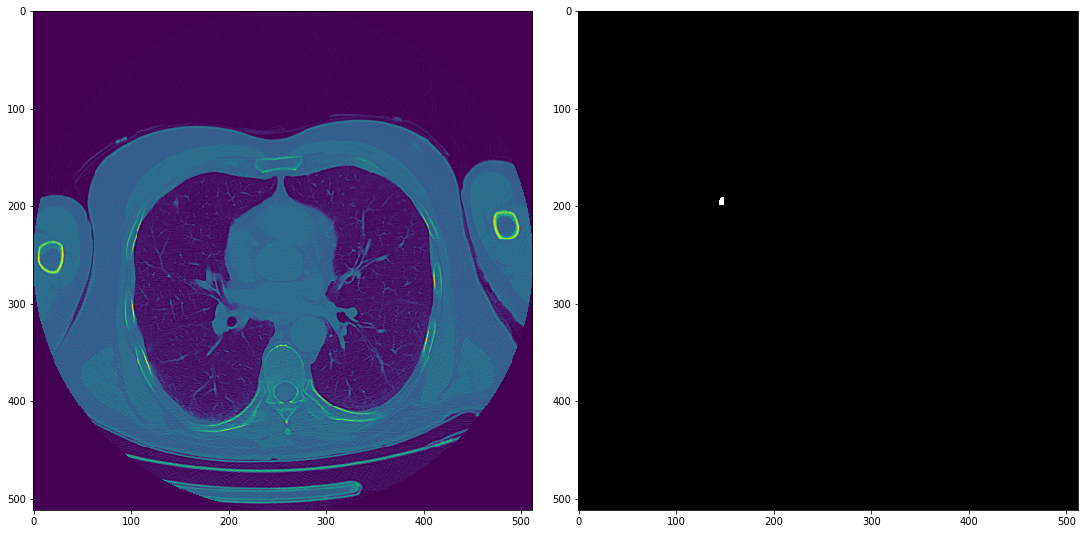

In [85]:
import pydicom as dicoms
f=r"finalData\dicom\bekir_bilgin\48.dcm"
imgp=r"finalData\mask\bekir_bilgin\48.jpg"
goruntu=dicoms.dcmread(f, force = True)
goruntu.file_meta.TransferSyntaxUID = dicoms.uid.ImplicitVRLittleEndian  
g= get_pixels_hu(goruntu)
fig, ax = plt.subplots(1,2,figsize=(15,15), constrained_layout=True)
mask = cv.imread(imgp,1)
ax[0].imshow(g)
ax[1].imshow(mask)

In [20]:
import pydicom as dicoms
goruntu=dicoms.dcmread(r"J:\yasin\finalData\dicom\zeki_kalkan\16.dcm", force = True)
goruntu.file_meta.TransferSyntaxUID = dicoms.uid.ImplicitVRLittleEndian  
print(goruntu)

TypeError: With tag (0023, 1070) got exception: unhashable type: 'list'
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\tag.py", line 27, in tag_in_exception
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\dataset.py", line 1724, in _pretty_str
    strings.append(indent_str + repr(data_element))
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\dataelem.py", line 664, in __repr__
    return str(self)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\dataelem.py", line 545, in __str__
    self.description()[:self.descripWidth],
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\dataelem.py", line 615, in description
    self.tag, self.private_creator)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\datadict.py", line 620, in private_dictionary_description
    return get_private_entry(tag, private_creator)[2]
  File "C:\ProgramData\Anaconda3\lib\site-packages\pydicom\datadict.py", line 524, in get_private_entry
    private_dict = private_dictionaries[private_creator]
TypeError: unhashable type: 'list'


In [56]:
 for i,row in df.iterrows(): 
        d_filepath=row["dicom_path"]
        goruntu=dicoms.dcmread(d_filepath, force = True)
        goruntu.file_meta.TransferSyntaxUID = dicoms.uid.ImplicitVRLittleEndian     
        try:                                  
            imgs = get_pixels_hu(goruntu)
        except Exception as e:            
            print(e)
            print(d_filepath)

The length of the pixel data in the dataset (248528 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\aysen_kadi\45.dcm
The length of the pixel data in the dataset (248980 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\aysen_kadi\46.dcm
The length of the pixel data in the dataset (244466 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\ayse_sekersoy\40.dcm
The length of the pixel data in the dataset (236936 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\Aytul Inkaya\57.dcm
The length of the pixel data in the dataset (237408 bytes) doesn't match the expected lengt

The length of the pixel data in the dataset (224892 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\nihat_yilmaz\54.dcm
The length of the pixel data in the dataset (224858 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\nihat_yilmaz\55.dcm
The length of the pixel data in the dataset (222950 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\nihat_yilmaz\60.dcm
The length of the pixel data in the dataset (223074 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
finalData\dicom\nihat_yilmaz\61.dcm
The length of the pixel data in the dataset (240160 bytes) doesn't match the expected le

In [86]:
data = df.sample(frac=1).reset_index(drop=True)
data

,patient,dicom_path,mask_path,size
0,Selahattin Fennibay,finalData\dicom\Selahattin Fennibay\43.dcm,finalData\mask\Selahattin Fennibay\43.jpg,527628
1,recep_aydogdu,finalData\dicom\recep_aydogdu\49.dcm,finalData\mask\recep_aydogdu\49.jpg,527628
2,mustafa_akar,finalData\dicom\mustafa_akar\49.dcm,finalData\mask\mustafa_akar\49.jpg,527626
3,Huseyin Beytas,finalData\dicom\Huseyin Beytas\20.dcm,finalData\mask\Huseyin Beytas\20.jpg,527622
4,Ayse Koc,finalData\dicom\Ayse Koc\58.dcm,finalData\mask\Ayse Koc\58.jpg,527602
...,...,...,...,...
128,sami_karakaya,finalData\dicom\sami_karakaya\67.dcm,finalData\mask\sami_karakaya\67.jpg,527618
129,Rukiye Kalayci,finalData\dicom\Rukiye Kalayci\35.dcm,finalData\mask\Rukiye Kalayci\35.jpg,527626
130,fatma_savan,finalData\dicom\fatma_savan\34.dcm,finalData\mask\fatma_savan\34.jpg,527600
131,Rukiye Kalayci,finalData\dicom\Rukiye Kalayci\11.dcm,finalData\mask\Rukiye Kalayci\11.jpg,527622


In [87]:
df

,patient,dicom_path,mask_path,size
0,abdullah_celik,finalData\dicom\abdullah_celik\56.dcm,finalData\mask\abdullah_celik\56.jpg,527604
1,ahmet_tamturk,finalData\dicom\ahmet_tamturk\18.dcm,finalData\mask\ahmet_tamturk\18.jpg,527606
2,ahmet_tamturk,finalData\dicom\ahmet_tamturk\19.dcm,finalData\mask\ahmet_tamturk\19.jpg,527602
3,Ayla Doker,finalData\dicom\Ayla Doker\34.dcm,finalData\mask\Ayla Doker\34.jpg,527616
4,Ayla Doker,finalData\dicom\Ayla Doker\54.dcm,finalData\mask\Ayla Doker\54.jpg,527616
...,...,...,...,...
214,sukriye_goksen,finalData\dicom\sukriye_goksen\35.dcm,finalData\mask\sukriye_goksen\35.jpg,527598
215,sukriye_goksen,finalData\dicom\sukriye_goksen\36.dcm,finalData\mask\sukriye_goksen\36.jpg,527590
224,tuncay_kocaturk,finalData\dicom\tuncay_kocaturk\26.dcm,finalData\mask\tuncay_kocaturk\26.jpg,527610
225,tuncay_kocaturk,finalData\dicom\tuncay_kocaturk\54.dcm,finalData\mask\tuncay_kocaturk\54.jpg,527610
